<a href="https://colab.research.google.com/github/Socrates-Simao/Socrates-Simao/blob/main/DadosConsumidor2019_ANAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. **Introdução**


Os dados aqui aprsentados são de origem da Agência Nacional de Aviaçãi Civil - ANAC.
A análise é referente as reclamações dos consumidores em meio a atendimentos das Cias Aéreas.


Vamos análisar com o intuito de gerar insigths que possam contribuir com a melhora do atendimento.

Perguntas a serem respondidas:


* Conhecer a base que será feita a análise
* Quais  cidades tem mais solicitações e quais menos solicitações
* Identificar quais são os 10 problemas mais comuns
* Qual o gênero que mais abre solicitações
* Qual a faixa etária que mais abre solicitações
* Mês de maior Ocorrência
* Percentual de ocorrência respondidas
* Nota do Consumidor pelo atendimento



Fonte do dataset:
https://dados.gov.br/home



***Nota: Forma de pensar na Análise -> Analisar o Dataset(Estrutura) - Análise Univariada - Análise Bivariada - Análise Multivariada - ML***

**1. Importar as bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

**2. Carregando o Dataset**

In [2]:
df = pd.read_csv('/content/DadosDoConsumidor2019.csv', delimiter=';', encoding='utf-8')
df


,Gestor,CanalDeOrigem,Região,UF,Cidade,Sexo,FaixaEtária,AnoAbertura,MêsAbertura,DataAbertura,...,ComoComprouContratou,ProcurouEmpresa,Respondida,Situação,AvaliaçãoReclamação,NotaDoConsumidor,AnáliseDaRecusa,EdiçãoDeConteúdo,InteraçãoDoGestor,CódigoClassificadorANAC
0,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,Barueri,M,entre 31 a 40 anos,2019,1,01/01/2019,...,Internet,S,S,Finalizada avaliada,Não Resolvida,4.0,NaN,N,N,2205
1,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,Ribeirão Pires,M,entre 31 a 40 anos,2019,1,01/01/2019,...,Não comprei / contratei,S,S,Finalizada avaliada,Não Resolvida,3.0,NaN,N,N,2225/2315
2,Secretaria Nacional do Consumidor,Plataforma Web,NE,RN,Serra Negra do Norte,M,entre 31 a 40 anos,2019,1,01/01/2019,...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,505
3,Instituto Municipal de Proteção e Defesa do Co...,Plataforma Web,SE,RJ,Rio de Janeiro,M,entre 31 a 40 anos,2019,1,01/01/2019,...,Internet,N,S,Finalizada avaliada,Resolvida,4.0,NaN,N,N,3505
4,Superintendência de Proteção e Defesa do Consu...,Plataforma Web,CO,GO,Goiânia,F,entre 21 a 30 anos,2019,1,01/01/2019,...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41235,Secretaria Nacional do Consumidor,Plataforma Web,S,RS,Porto Alegre,M,entre 31 a 40 anos,2019,10,29/10/2019,...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,Improcedente,N,N,N-N-POA-D-G3-3325
41236,Programa Estadual de Proteção e Defesa do Cons...,Plataforma Web,SE,MG,Belo Horizonte,M,entre 41 a 50 anos,2019,10,29/10/2019,...,Internet,S,S,Finalizada avaliada,Resolvida,1.0,NaN,N,N,S-N-T-I-P-0305/7100
41237,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,São Paulo,M,entre 21 a 30 anos,2019,10,29/10/2019,...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,N-I-W-D-P-5405
41238,Superintendência de Proteção e Defesa do Consu...,Plataforma Web,CO,GO,Cristalina,M,entre 21 a 30 anos,2019,10,29/10/2019,...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,N,N,N-P-W-D-P-0920/0935


In [3]:
print(df.columns)


Index(['Gestor', 'CanalDeOrigem', 'Região', 'UF', 'Cidade', 'Sexo',
       'FaixaEtária', 'AnoAbertura', 'MêsAbertura', 'DataAbertura',
       'HoraAbertura', 'DataResposta', 'HoraResposta', 'DataAnálise',
       'HoraAnálise', 'DataRecusa', 'HoraRecusa', 'DataFinalização',
       'HoraFinalização', 'PrazoResposta', 'PrazoAnaliseGestor',
       'TempoResposta', 'NomeFantasia', 'SegmentoDeMercado', 'Área', 'Assunto',
       'GrupoProblema', 'Problema', 'ComoComprouContratou', 'ProcurouEmpresa',
       'Respondida', 'Situação', 'AvaliaçãoReclamação', 'NotaDoConsumidor',
       'AnáliseDaRecusa', 'EdiçãoDeConteúdo', 'InteraçãoDoGestor',
       'CódigoClassificadorANAC'],
      dtype='object')


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41240 entries, 0 to 41239
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gestor                   41240 non-null  object 
 1   CanalDeOrigem            41240 non-null  object 
 2   Região                   41240 non-null  object 
 3   UF                       41240 non-null  object 
 4   Cidade                   41240 non-null  object 
 5   Sexo                     41240 non-null  object 
 6   FaixaEtária              41240 non-null  object 
 7   AnoAbertura              41240 non-null  int64  
 8   MêsAbertura              41240 non-null  int64  
 9   DataAbertura             41240 non-null  object 
 10  HoraAbertura             41240 non-null  object 
 11  DataResposta             36778 non-null  object 
 12  HoraResposta             36778 non-null  object 
 13  DataAnálise              2560 non-null   object 
 14  HoraAnálise           

**3. Análise de Dados**

In [5]:
# Contagem de solicitações por cidade
solicitacoes_por_cidade = df['Cidade'].value_counts()

# Cidade com mais solicitações
cidade_mais_solicitacoes = solicitacoes_por_cidade.idxmax()
total_solicitacoes_cidade_mais = solicitacoes_por_cidade.max()

# Cidade com menos solicitações
cidade_menos_solicitacoes = solicitacoes_por_cidade.idxmin()
total_solicitacoes_cidade_menos = solicitacoes_por_cidade.min()

# Filtrando as solicitações respondidas à pesquisa
solicitacoes_respondidas = df[df['Respondida'] == 'Sim']

# Contagem de solicitações respondidas por cidade
solicitacoes_respondidas_por_cidade = solicitacoes_respondidas['Cidade'].value_counts()


# Exibindo as 100 cidades com mais solicitações
print("\nAs 100 cidades com mais solicitações:")
print(solicitacoes_por_cidade.head(100))

# Exibindo as 100 cidades com menos solicitações
print("\nAs 100 cidades com menos solicitações:")
print(solicitacoes_por_cidade.tail(100))





As 100 cidades com mais solicitações:
Cidade
São Paulo               5785
Brasília                3685
Rio de Janeiro          2724
Belo Horizonte          1909
Curitiba                1563
                        ... 
Americana                 49
Taboão da Serra           48
Vitória da Conquista      48
Sinop                     48
Itapema                   47
Name: count, Length: 100, dtype: int64

As 100 cidades com menos solicitações:
Cidade
Fronteiras        1
Rafard            1
Guatambú          1
Socorro           1
Porto Nacional    1
                 ..
Faria Lemos       1
Alto Garças       1
Maria da Fé       1
São Jerônimo      1
Mirinzal          1
Name: count, Length: 100, dtype: int64


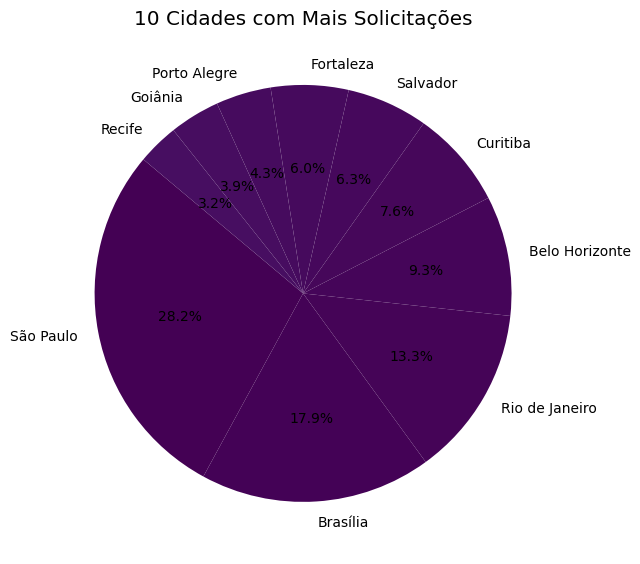

In [6]:

# Criando um novo DataFrame contendo as 100 cidades com mais solicitações
top_cidades_mais_solicitacoes = solicitacoes_por_cidade.head(10)

# Plotando os gráficos de pizza para as 100 cidades com mais e menos solicitações
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(top_cidades_mais_solicitacoes, labels=top_cidades_mais_solicitacoes.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis.colors)
plt.title('10 Cidades com Mais Solicitações')


plt.tight_layout()
plt.show()


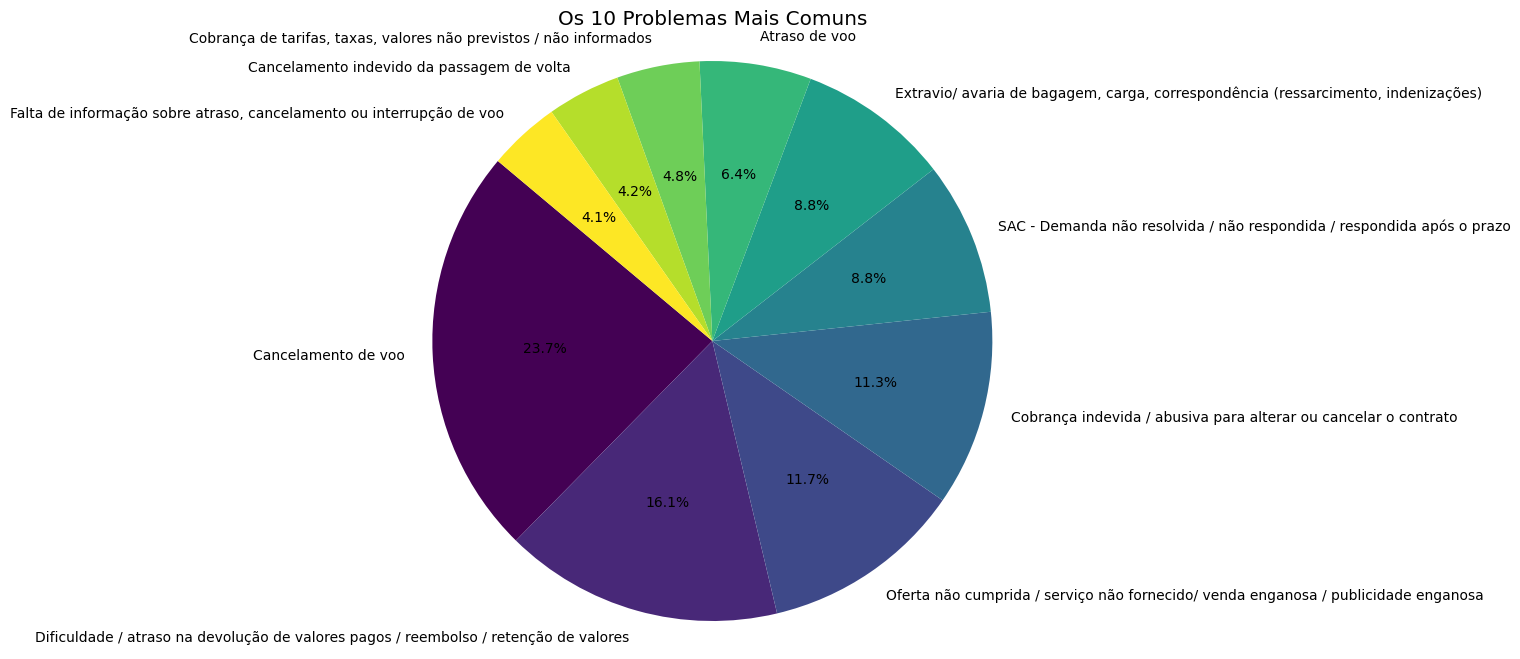

In [7]:

# Contagem de todos os tipos de problemas
tipos_de_problemas = df['Problema'].value_counts()

# Ordenando os tipos de problemas pela frequência
tipos_de_problemas_ordenados = tipos_de_problemas.sort_values(ascending=False)

# Selecionando apenas os 10 problemas mais comuns
top_10_problemas = tipos_de_problemas_ordenados.head(10)

# Criando uma lista de cores que varia de acordo com os valores
cores = plt.cm.viridis(np.linspace(0, 1, len(top_10_problemas)))

# Plotando o gráfico de pizza com as cores
plt.figure(figsize=(10,8))
plt.pie(top_10_problemas, labels=top_10_problemas.index, autopct='%1.1f%%', startangle=140, colors=cores)
plt.title('Os 10 Problemas Mais Comuns')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()







In [8]:
# Contagem de solicitações por gênero
solicitacoes_por_genero = df['Sexo'].value_counts()

# Exibindo resultados para todos os gêneros em ordem decrescente
print("Solicitações por Gênero (em ordem decrescente):")
for genero, solicitacoes in solicitacoes_por_genero.items():
    print(f"{genero}: {solicitacoes} solicitações")

# Listando todas as solicitações
print("\nTodas as solicitações:")
print(df[['Sexo', 'Problema']])




Solicitações por Gênero (em ordem decrescente):
M: 22836 solicitações
F: 18404 solicitações

Todas as solicitações:
      Sexo                                           Problema
0        M  Alteração / rescisão de contrato sem solicitaç...
1        M                   Falta de atendimento prioritário
2        M  Negativa de embarque de passageiro (preterição...
3        M  Negativa de embarque de passageiro (preterição...
4        F  Cobrança indevida / abusiva para alterar ou ca...
...    ...                                                ...
41235    M                                Cancelamento de voo
41236    M  SAC - Demanda não resolvida / não respondida /...
41237    M          SAC - Dificuldade para cancelar o serviço
41238    M  Cobrança em duplicidade / Cobrança referente a...
41239    M  Dificuldade / atraso na devolução de valores p...

[41240 rows x 2 columns]


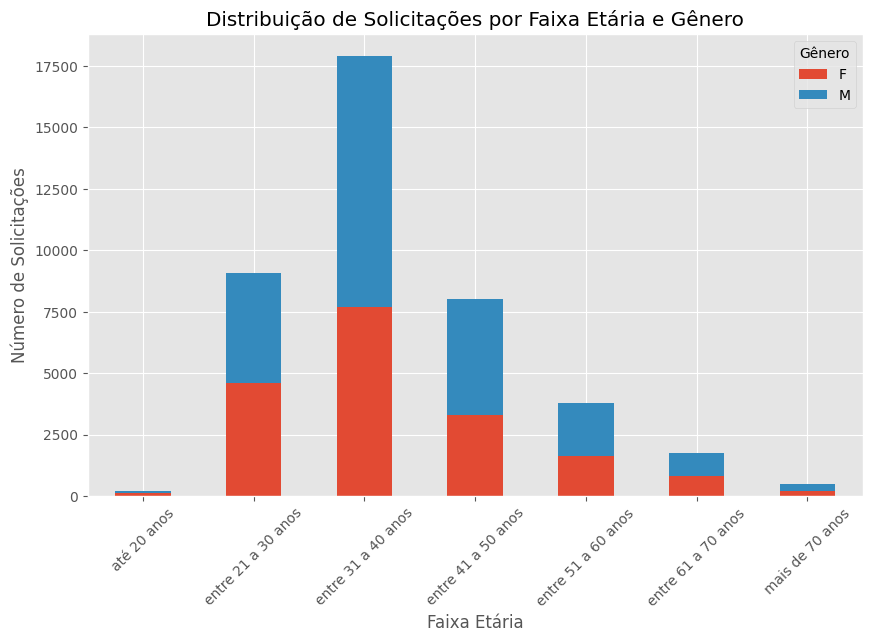

In [9]:


import matplotlib.pyplot as plt

# Criando um DataFrame pivot para contar as solicitações por gênero e faixa etária
pivot_df = df.pivot_table(index='FaixaEtária', columns='Sexo', aggfunc='size', fill_value=0)

# Plotando o gráfico de barras empilhadas
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribuição de Solicitações por Faixa Etária e Gênero')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Solicitações')
plt.xticks(rotation=45)
plt.legend(title='Gênero')
plt.show()





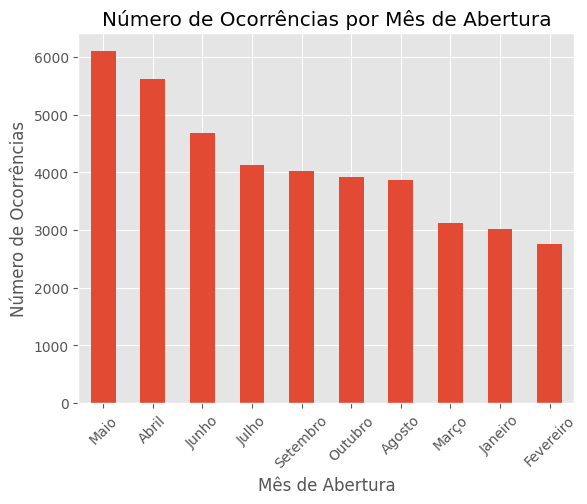

In [10]:
nomes_meses = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

mes_abertura_counts = df['MêsAbertura'].value_counts()
# Substituir os números dos meses pelos nomes dos meses na Series
mes_abertura_counts.index = mes_abertura_counts.index.map(nomes_meses)

# Gráfico de Barras de Mês de Abertura
mes_abertura_counts.plot(kind='bar')
plt.xlabel('Mês de Abertura')
plt.ylabel('Número de Ocorrências')
plt.title('Número de Ocorrências por Mês de Abertura')
plt.xticks(rotation=45)
plt.show()

**Acima podemos perceber que no mês de maio é o período em que mais tem solicitações e o mês de fevereiro é o menor período**

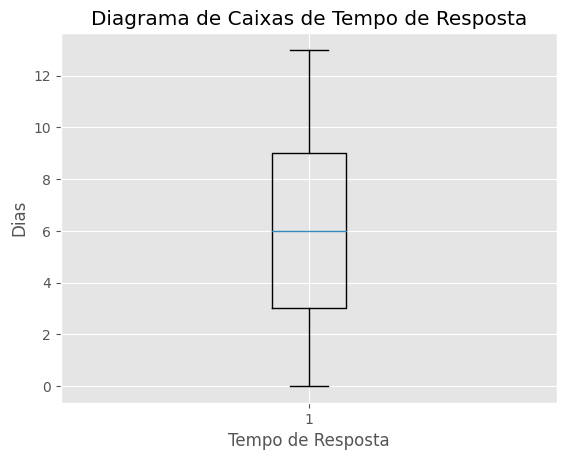

In [11]:
# Diagrama de Caixas de Tempo de Resposta
plt.boxplot(df['TempoResposta'].dropna())
plt.xlabel('Tempo de Resposta')
plt.ylabel('Dias')
plt.title('Diagrama de Caixas de Tempo de Resposta')
plt.show()



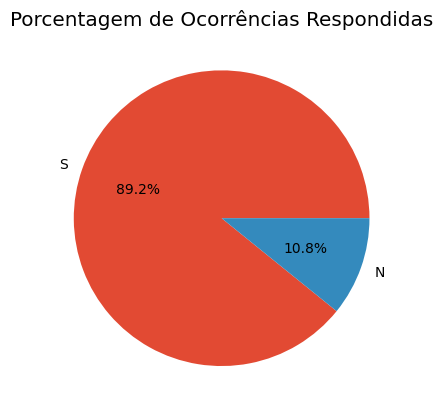

In [12]:
# Contagem de ocorrências de 'Respondida'
respondida_counts = df['Respondida'].value_counts()

# Gráfico de Pizza de Respondida
respondida_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Porcentagem de Ocorrências Respondidas')
plt.show()


Text(0.5, 1.0, 'Histograma de Nota do Consumidor')

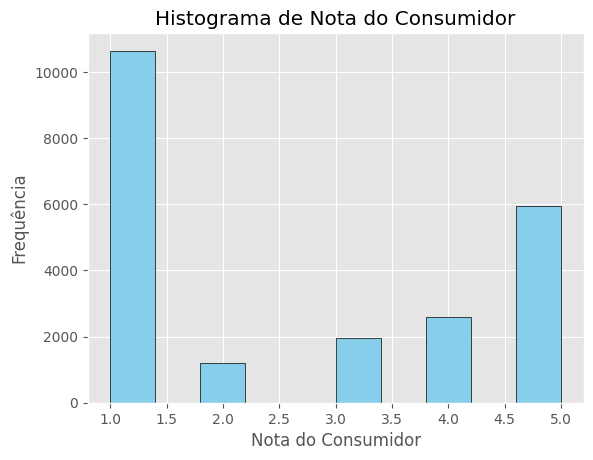

In [13]:
# Plotando um histograma
plt.hist(df['NotaDoConsumidor'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Nota do Consumidor')
plt.ylabel('Frequência')
plt.title('Histograma de Nota do Consumidor')




In [14]:
# Calculando medidas de resumo
Valores = df['NotaDoConsumidor'].describe()
Valores

count    22333.000000
mean         2.640845
std          1.734921
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max          5.000000
Name: NotaDoConsumidor, dtype: float64